<a href="https://www.kaggle.com/code/bipinneupane1/assignment2-samden?scriptVersionId=179832299" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Necessary Imports

In [111]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten,Dense,Dropout,BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models  import Sequential

# Directories


In [112]:
train_dataset = '../input/masked-fer2013/Masked-fer2013/train'
test_dataset = '../input/masked-fer2013/Masked-fer2013/validation'
emotion_list = os.listdir(train_dataset)

## Viewing sample data

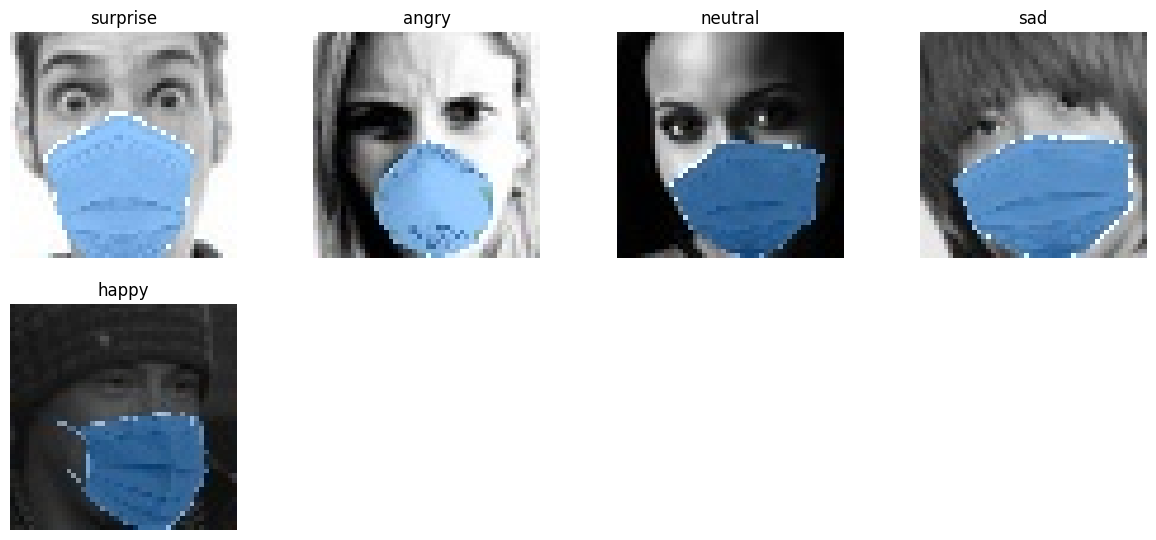

In [113]:


plt.figure(figsize=(15, 10))

for i, emotion in enumerate(emotion_list, 1):
    folder = os.path.join(train_dataset, emotion)
    img_name = random.choice(os.listdir(folder))
    img_path = os.path.join(folder, img_name)
    img = plt.imread(img_path)
    plt.subplot(3, 4, i)
    plt.imshow(img)
    plt.title(emotion)
    plt.axis('off')  # Turn off axis labels
plt.show()


In [114]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [115]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dataset,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dataset,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation"
)


Found 13677 images belonging to 5 classes.
Found 848 images belonging to 5 classes.


In [116]:
model = tf.keras.models.Sequential()

# First block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Second block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Third block
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Fourth block
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_73 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_91          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_92          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_93          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 7,220,165 (27.54 MB)

 Trainable params: 7,214,533 (27.52 MB)

 Non-trainable params: 5,632 (22.00 KB)

In [117]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_73 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_91          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_92          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_93          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 7,220,165 (27.54 MB)

 Trainable params: 7,214,533 (27.52 MB)

 Non-trainable params: 5,632 (22.00 KB)

In [118]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [119]:
epochs = 25
batch_size = 64

In [120]:


history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
)

Epoch 1/25
  2/214 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.1719 - loss: 17.2138   

W0000 00:00:1716721095.793576     165 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 87/214 ━━━━━━━━━━━━━━━━━━━━ 43s 341ms/step - accuracy: 0.1951 - loss: 17.0064

W0000 00:00:1716721124.976554     164 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.2020 - loss: 16.8504

W0000 00:00:1716721138.069940     164 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


214/214 ━━━━━━━━━━━━━━━━━━━━ 76s 212ms/step - accuracy: 0.2021 - loss: 16.8482 - val_accuracy: 0.2524 - val_loss: 15.4363
Epoch 2/25


W0000 00:00:1716721140.911440     162 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


214/214 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.2208 - loss: 15.9593 - val_accuracy: 0.1958 - val_loss: 14.8122
Epoch 3/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.2316 - loss: 15.1117 - val_accuracy: 0.2995 - val_loss: 13.9271
Epoch 4/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.2420 - loss: 14.2728 - val_accuracy: 0.3090 - val_loss: 13.1966
Epoch 5/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.2645 - loss: 13.4447 - val_accuracy: 0.2547 - val_loss: 12.5233
Epoch 6/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.2636 - loss: 12.6554 - val_accuracy: 0.2689 - val_loss: 11.7774
Epoch 7/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.2774 - loss: 11.8441 - val_accuracy: 0.2311 - val_loss: 11.1274
Epoch 8/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.2843 - loss: 11.0834 - val_accuracy: 0.1887 - val_loss: 10.9199
Epoch 9/25
214/214 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.3111 - loss: 10.313

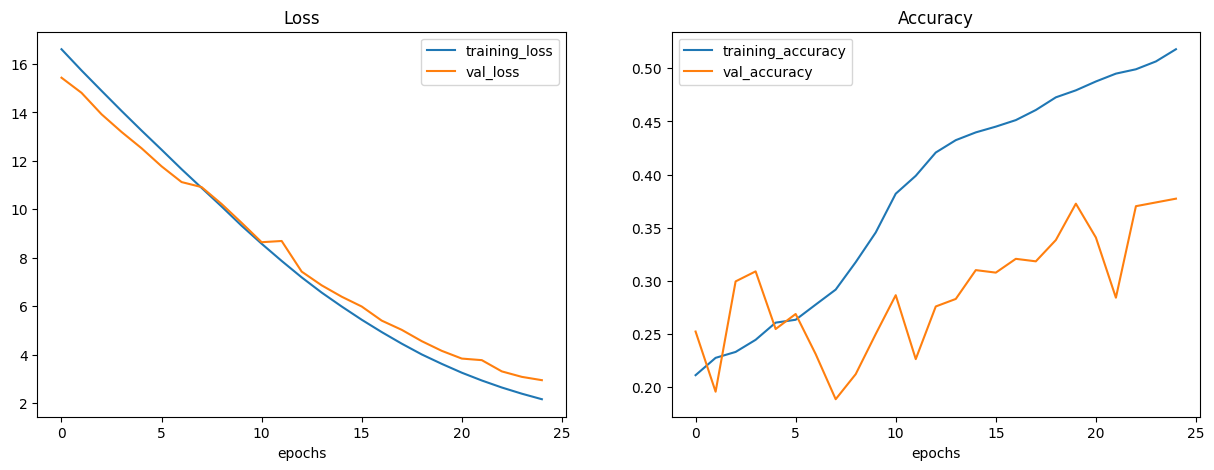

In [121]:
# Function to plot training curves
def plot_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

plot_curves(history)

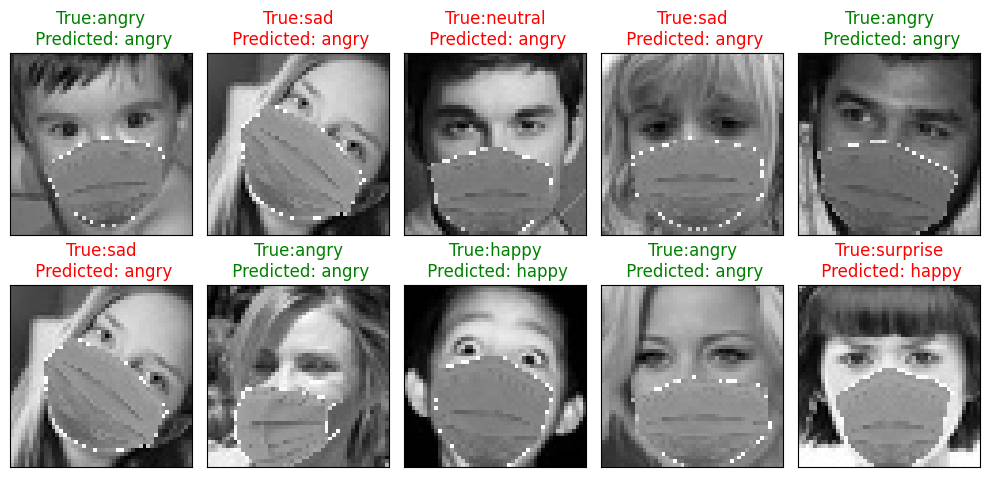

In [125]:

batch_size = validation_generator.batch_size

Random_batch = np.random.randint(0,len(validation_generator)-1)

Random_Img_Index = np.random.randint(0, batch_size,10)

fig, axes = plt.subplots(nrows=2,ncols=5,figsize=(10,5),
                        subplot_kw = {'xticks':[],'yticks':[]})

for i, ax in enumerate(axes.flat):
    Random_Img = validation_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(validation_generator[Random_batch][1][Random_Img_Index[i]], axis=0)
    
    Model_Prediction = np.argmax(model.predict(tf.expand_dims(Random_Img, axis=0),verbose =0),axis=1)[0]
    ax.imshow(Random_Img.squeeze(), cmap = 'gray')
    
    color = 'green' if emotion_list[Random_Img_Label] == emotion_list[Model_Prediction] else 'Red'
    ax.set_title(f'True:{emotion_list[Random_Img_Label]}\n Predicted: {emotion_list[Model_Prediction]}', color = color)
    
plt.tight_layout()
plt.show()

In [126]:
model.save('mask_detect.h5')
print("Saved model to disk")

Saved model to disk
